In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import scipy.stats as stats
import statsmodels.api as sm

## Loading housing data.

In [64]:
data = pd.read_csv("Data/housing.csv")
data


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [65]:
data.columns



Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [66]:
data.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [68]:
data["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

### Independent Variables :
- Longitude.
- Latitude.
- Housing_median_age.
- Total_rooms.
- Total_bedrooms.
- Population.
- Households.
- Median _income.
- Ocean_ proximity.
---
### Dependent Variables :
- Median_House_Value.

## Check for Missing data.

In [69]:
missing_values = data.isnull().sum()
percentage_missing = (missing_values/len(data))*100
print("Percentages of Missing data each column \n" , percentage_missing)
print("\n Missing data each column\n" , missing_values)

Percentages of Missing data each column 
 longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64

 Missing data each column
 longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [70]:
# Remove the missing values

cleaned_data = data.dropna()
missing_values = cleaned_data.isnull().sum()
percentage_missing = (missing_values/len(data))*100
print("Percentages of Missing data each column \n" , percentage_missing)
print("\n Missing data each column\n" , missing_values)




Percentages of Missing data each column 
 longitude             0.0
latitude              0.0
housing_median_age    0.0
total_rooms           0.0
total_bedrooms        0.0
population            0.0
households            0.0
median_income         0.0
median_house_value    0.0
ocean_proximity       0.0
dtype: float64

 Missing data each column
 longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


In [71]:
print(cleaned_data.isnull().sum())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


## Data Exploration and Visualization.

In [72]:
data.describe() 
# # the describe function gives the desciptive stats of all the data like the mean,
# count, std , variance etc

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


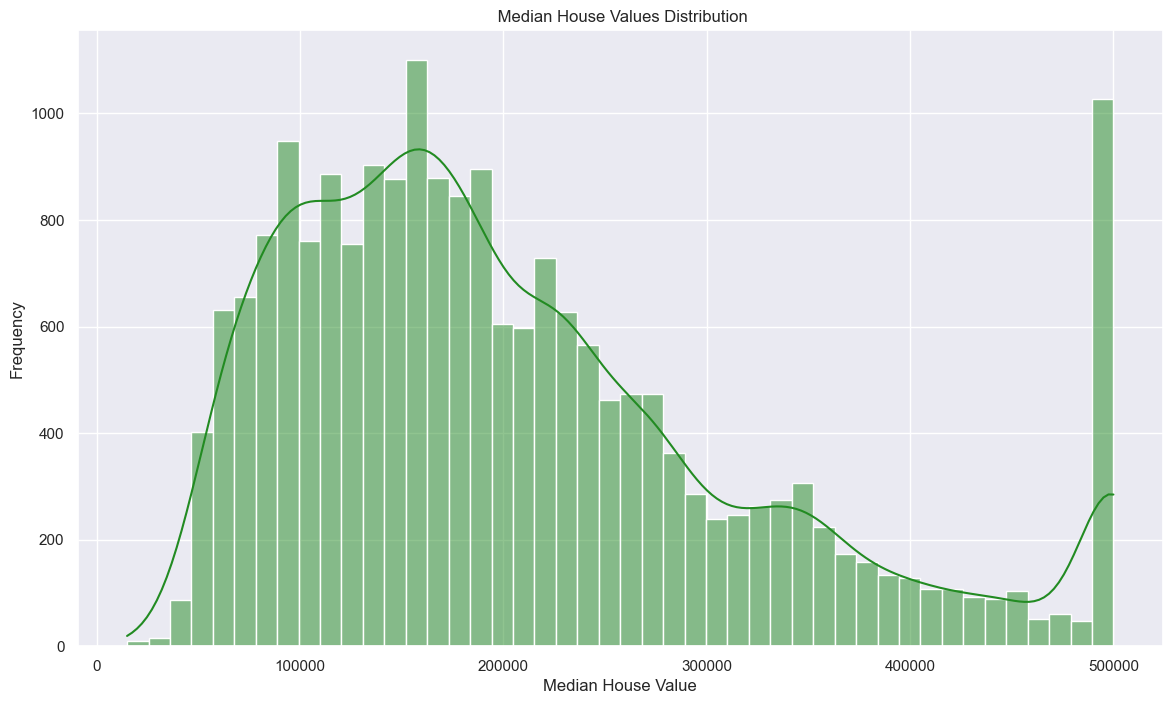

In [73]:
sns.set(style="darkgrid")
plt.figure(figsize=(14,8))
sns.histplot(cleaned_data["median_house_value"], color='ForestGreen', kde=True)
plt.title(" Median House Values Distribution")
plt.xlabel("Median House Value")
plt.ylabel("Frequency")
plt.show()

## Removing Data Outliers using the Inter-Quartile Range. 


Outliers are Data Points that significantly deviate from the rest of the data. Remember inter-quartile range is Q3-Q1.

In [74]:
# find the ranges
Q1 = cleaned_data["median_house_value"].quantile(0.25)
Q3 = cleaned_data["median_house_value"].quantile(0.75)
Inter_quartile_range = Q3 - Q1
print(Q1)
print(Q3)
print(Inter_quartile_range)

# Data Bounds
upper_bound = Q3 + 1.5 * Inter_quartile_range
lower_bound = Q1 - 1.5 * Inter_quartile_range



119500.0
264700.0
145200.0


In [75]:

# Data Bounds
upper_bound = Q3 + 1.5 * Inter_quartile_range
lower_bound = Q1 - 1.5 * Inter_quartile_range

print(upper_bound)
print(lower_bound)


482500.0
-98300.0


In [76]:
# Remove the Outliers

no_Outliers = cleaned_data[(cleaned_data["median_house_value"] >= lower_bound ) & (cleaned_data["median_house_value"] <= upper_bound)]
# Check Data Shape
print("Previous Data Shape", cleaned_data.shape)
print("New data shape without outliers", no_Outliers.shape)

Previous Data Shape (20433, 10)
New data shape without outliers (19369, 10)


## BoxPlot for Outlier Detection
### Outliers in Median Income

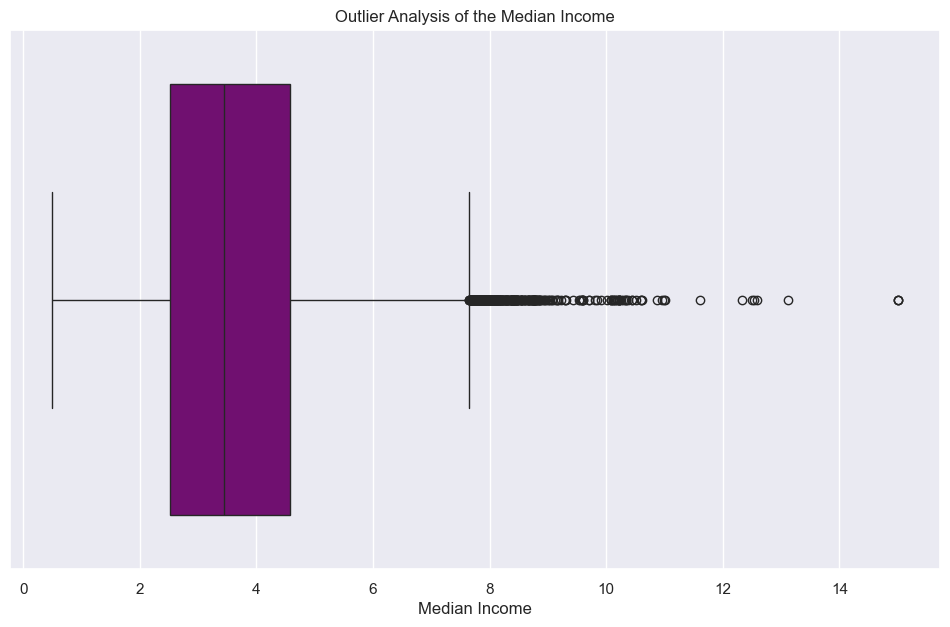

In [77]:
plt.figure(figsize=(12,7))
sns.boxplot(x = no_Outliers["median_income"], color="purple")
plt.title("Outlier Analysis of the Median Income")
plt.xlabel("Median Income")
plt.show()

In [78]:
# Calculate Q1 and Q3.
Q1 = no_Outliers["median_income"].quantile(0.25)
Q3 = no_Outliers["median_income"].quantile(0.75)
IQR = Q3 - Q1

# Data Bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Renmove Outliers
no_Outliers_2 = no_Outliers[(no_Outliers["median_income"] >= lower_bound) & (no_Outliers["median_income"]<= upper_bound)]

print("Original Data Shape", no_Outliers.shape)
print("New Median Income without outliers", no_Outliers_2.shape)

Original Data Shape (19369, 10)
New Median Income without outliers (19026, 10)


In [79]:
data = no_Outliers_2
data.columns


Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

## Correlation HeatMap

In [80]:
#convert text data of ocean_proximity to numbers
ocean_proximity_dummies = pd.get_dummies(data["ocean_proximity"], prefix= "ocean_proximity")
data = pd.concat([data.drop("ocean_proximity", axis=1), ocean_proximity_dummies], axis=1)
ocean_proximity_dummies


,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
2,False,False,False,True,False
3,False,False,False,True,False
4,False,False,False,True,False
5,False,False,False,True,False
6,False,False,False,True,False
...,...,...,...,...,...
20635,False,True,False,False,False
20636,False,True,False,False,False
20637,False,True,False,False,False
20638,False,True,False,False,False


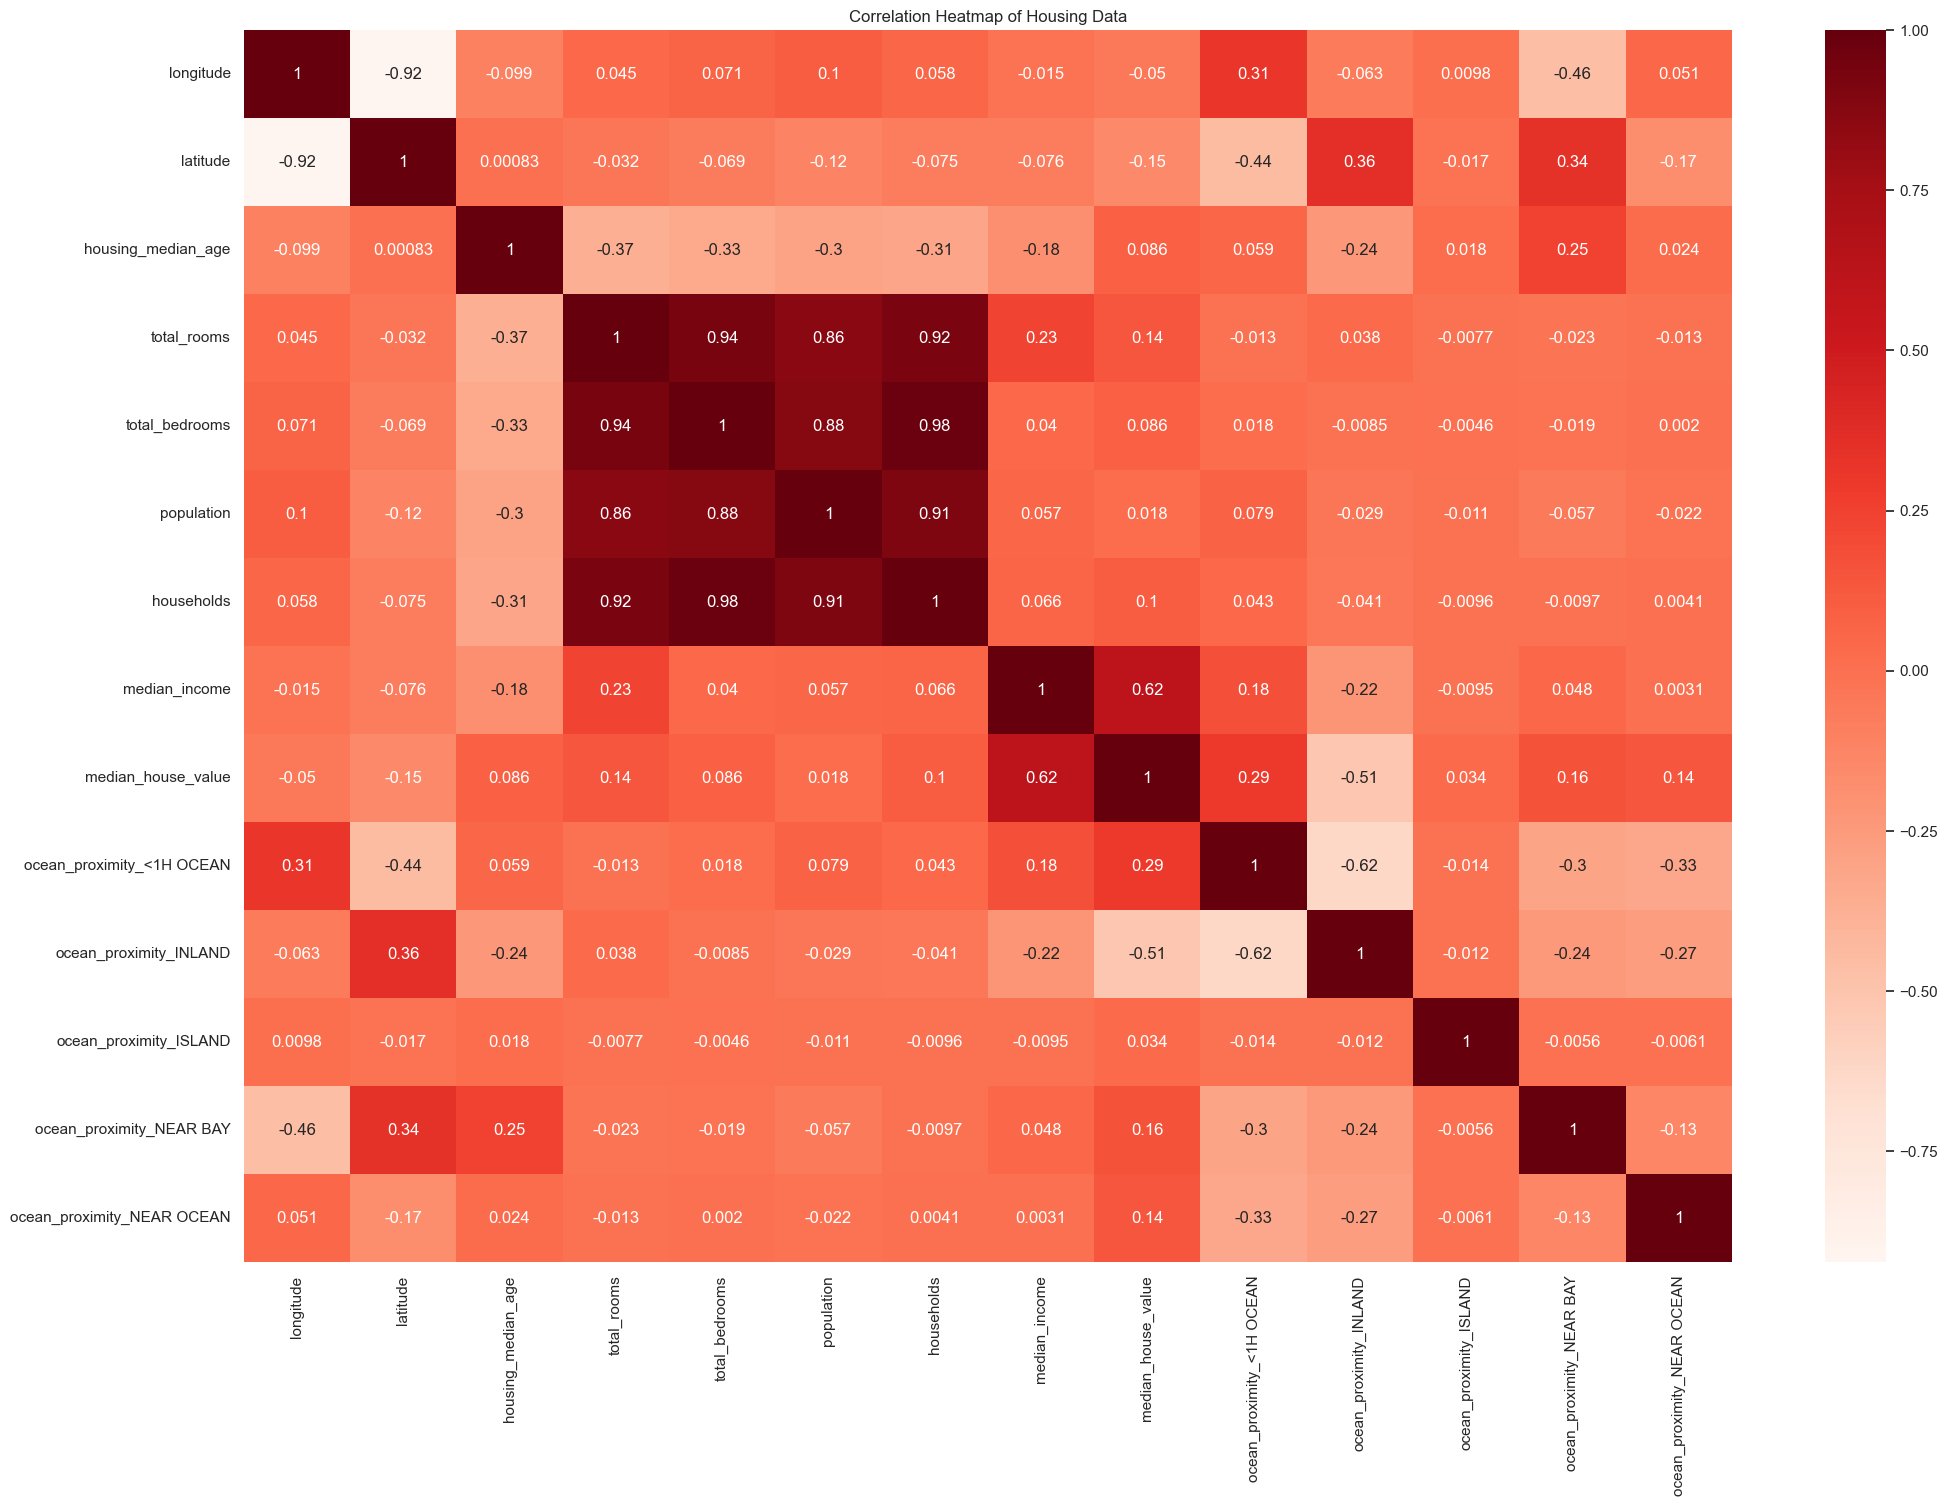

In [81]:
plt.figure(figsize=(24,16))
sns.heatmap(data.corr(), annot = True, cmap= "Reds")
plt.title("Correlation Heatmap of Housing Data")
plt.show()


- THE DARKER THE COLOUR THE HIGHER THE CORRELATION
- THIS VIOLATES THE ASSUMPTION OF LINEAR-REGRESSION THAT WE SHOULD NOT HAVE MULTICOLLINEARITY.
- THIS WILL RESULT IN LARGE STANDARD ERROS AND ALSO AN INACCURATE NOT GENERALIZABLE MODEL.
- DROP THE INDEPENT VARIABLE REGISTERING HIGHEST CORRELATION WITH OTHER INDEPENDENT AND LOWEST WITH THE DEPENDENT (median_house_value). IN OUR CASE DROP TOTAL_BEDROOMS.


In [82]:
data = data.drop("total_bedrooms", axis = 1)
data.columns


Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', 'median_house_value',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

## Splitting the Data in Training and Testing.


In [83]:
# Define the data features (independent varibles) and target ( dependent variables).
features= ['longitude', 'latitude', 'housing_median_age', 'total_rooms','median_house_value',
        'population', 'households', 'median_income','ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
        'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
        'ocean_proximity_NEAR OCEAN']
target = ["median_house_value"]
x = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=1111)
#check data proportions for train and test.

print(f'Training set size: {X_train.shape[0]} samples')
print(f'Testing set size: {X_test.shape[0]} samples')

Training set size: 15220 samples
Testing set size: 3806 samples


### Training

In [84]:
X_train

,longitude,latitude,housing_median_age,total_rooms,median_house_value,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
15578,-116.90,33.03,11.0,3213.0,167200.0,1975.0,579.0,3.4750,True,False,False,False,False
1656,-121.93,37.89,13.0,2085.0,366700.0,852.0,264.0,7.3445,False,True,False,False,False
9190,-118.35,34.32,52.0,102.0,191700.0,54.0,32.0,1.9875,True,False,False,False,False
11839,-120.95,39.93,26.0,2023.0,83500.0,922.0,365.0,2.8125,False,True,False,False,False
12267,-116.91,33.75,13.0,10886.0,123400.0,4266.0,1955.0,2.3169,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15355,-117.32,33.25,7.0,8206.0,170900.0,4399.0,1423.0,3.6301,True,False,False,False,False
9608,-120.51,37.29,20.0,4927.0,79800.0,4205.0,1009.0,1.7679,False,True,False,False,False
12606,-121.49,38.50,32.0,2364.0,84500.0,1331.0,449.0,3.3190,False,True,False,False,False
2907,-119.03,35.37,52.0,1503.0,126600.0,554.0,277.0,1.6786,False,True,False,False,False


In [85]:
# Adding a constant to the predictors because statsmodel's OLS doesn't include it by default.
X_train_const = sm.add_constant(X_train)
X_train_const

,const,longitude,latitude,housing_median_age,total_rooms,median_house_value,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
15578,1.0,-116.90,33.03,11.0,3213.0,167200.0,1975.0,579.0,3.4750,True,False,False,False,False
1656,1.0,-121.93,37.89,13.0,2085.0,366700.0,852.0,264.0,7.3445,False,True,False,False,False
9190,1.0,-118.35,34.32,52.0,102.0,191700.0,54.0,32.0,1.9875,True,False,False,False,False
11839,1.0,-120.95,39.93,26.0,2023.0,83500.0,922.0,365.0,2.8125,False,True,False,False,False
12267,1.0,-116.91,33.75,13.0,10886.0,123400.0,4266.0,1955.0,2.3169,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15355,1.0,-117.32,33.25,7.0,8206.0,170900.0,4399.0,1423.0,3.6301,True,False,False,False,False
9608,1.0,-120.51,37.29,20.0,4927.0,79800.0,4205.0,1009.0,1.7679,False,True,False,False,False
12606,1.0,-121.49,38.50,32.0,2364.0,84500.0,1331.0,449.0,3.3190,False,True,False,False,False
2907,1.0,-119.03,35.37,52.0,1503.0,126600.0,554.0,277.0,1.6786,False,True,False,False,False


In [86]:
print(X_train_const.dtypes)
print(y_train.dtypes)


const                         float64
longitude                     float64
latitude                      float64
housing_median_age            float64
total_rooms                   float64
median_house_value            float64
population                    float64
households                    float64
median_income                 float64
ocean_proximity_<1H OCEAN        bool
ocean_proximity_INLAND           bool
ocean_proximity_ISLAND           bool
ocean_proximity_NEAR BAY         bool
ocean_proximity_NEAR OCEAN       bool
dtype: object
median_house_value    float64
dtype: object


In [87]:
# Get column names of boolean type
bool_cols = X_train_const.select_dtypes(include=['bool']).columns
print("Boolean Columns:", bool_cols)

Boolean Columns: Index(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')


In [88]:
#convert Boolean colums to integers.
X_train_const[bool_cols] = X_train_const[bool_cols].astype(int)
print(X_train_const.dtypes)


const                         float64
longitude                     float64
latitude                      float64
housing_median_age            float64
total_rooms                   float64
median_house_value            float64
population                    float64
households                    float64
median_income                 float64
ocean_proximity_<1H OCEAN       int32
ocean_proximity_INLAND          int32
ocean_proximity_ISLAND          int32
ocean_proximity_NEAR BAY        int32
ocean_proximity_NEAR OCEAN      int32
dtype: object


In [89]:
# Fit the OLS model
model_fitted = sm.OLS(y_train, X_train_const).fit()

# Print the summary
print(model_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.742e+32
Date:                Fri, 01 Nov 2024   Prob (F-statistic):               0.00
Time:                        13:52:46   Log-Likelihood:             3.1504e+05
No. Observations:               15220   AIC:                        -6.301e+05
Df Residuals:                   15207   BIC:                        -6.300e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

## Prediction/Testing

In [90]:
X_test_const = sm.add_constant(X_test)
#making predictions on test data
test_predictions = model_fitted.predict(X_test_const)
test_predictions

7322     164400.0
465      196400.0
12768     65200.0
2617      73600.0
13351    195100.0
           ...   
11691    217000.0
1454     229200.0
7360     142000.0
19118    200600.0
13084    129500.0
Length: 3806, dtype: object

### Checking OLS Assumptions

#### Assumption 1: Linearity

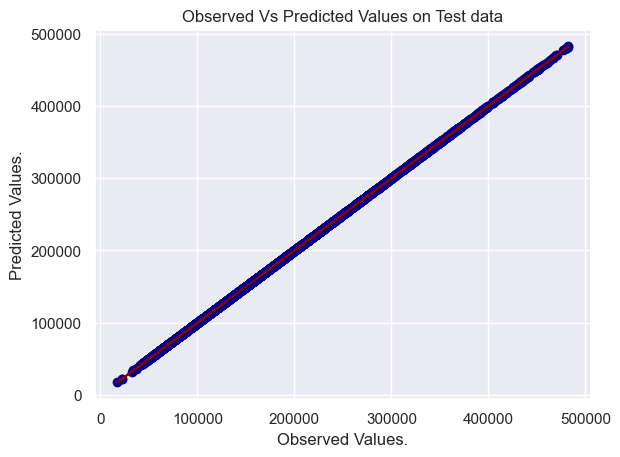

In [91]:
# Scatter plot for observed vs predicted values on test data.
plt.scatter(y_test, test_predictions, color = "DarkBlue")
plt.xlabel('Observed Values.')
plt.ylabel("Predicted Values.")
plt.title("Observed Vs Predicted Values on Test data")
plt.plot(y_test,y_test, color ="darkred") #line for perfect prediction(true values)
plt.show()

The red line ( perfect prediction line ) and the distribution of the fata points suggest that there is a positive linear relationship between observed and predicted values. Saying as the actual values increase the predited will also increase,

### Random Sample

In [92]:
# Mean of residuals
mean_residuals = np.mean(model_fitted.resid)
print(f"The mean of the residuals is : {np.round(mean_residuals,2)}")

The mean of the residuals is : 0.0


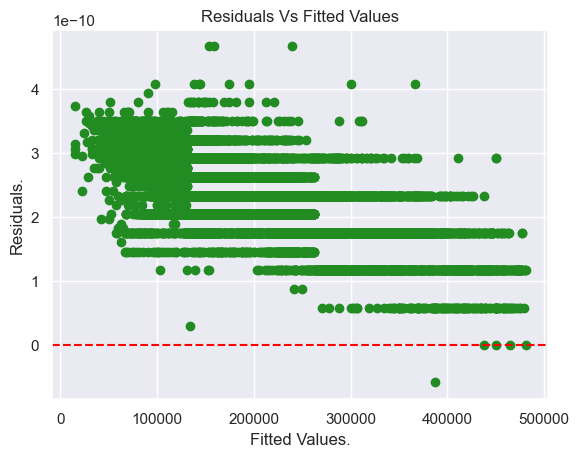

In [93]:
# Scatter plot for observed vs predicted values on test data.
plt.scatter(model_fitted.fittedvalues, model_fitted.resid, color = "forestgreen")
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Fitted Values.')
plt.ylabel("Residuals.")
plt.title("Residuals Vs Fitted Values")
plt.show()